In [1]:
matrix = None

Weighted Adjacency Matrix:
[[0 0 0 0 1 0 0 0]
 [0 0 0 0 1 1 0 1]
 [0 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 1 1]
 [1 1 1 0 0 1 0 1]
 [0 1 0 1 1 0 1 0]
 [0 0 1 1 0 1 0 0]
 [0 1 0 1 1 0 0 0]]
Number of crossing edges: 9


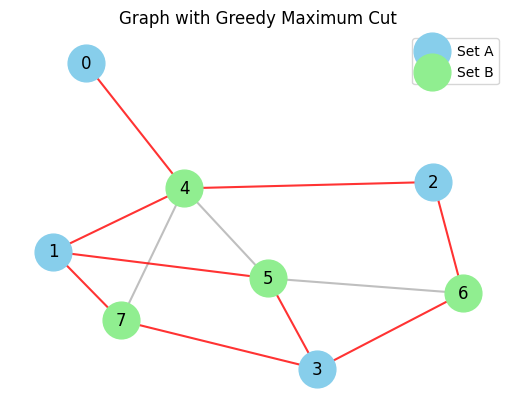

In [34]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# def generate_random_weighted_adj_matrix(size=5, max_weight=10):
#     np.random.seed()  # For reproducibility
#     adj_matrix = np.zeros((size, size), dtype=int)
#     for i in range(size):
#         for j in range(i + 1, size):
#             weight = np.random.randint(1, max_weight + 1)
#             adj_matrix[i][j] = weight
#             adj_matrix[j][i] = weight  # Ensure the graph is undirected
#     return adj_matrix

# def generate_random_weighted_adj_matrix(size=5, max_weight=10):
#     np.random.seed()  # For reproducibility
#     adj_matrix = np.zeros((size, size), dtype=int)

#     # Generate a random number of edges for each vertex
#     num_edges_per_vertex = np.random.randint(1, size + 1, size=size)

#     for i in range(size):
#         for j in range(i + 1, size):
#             if num_edges_per_vertex[i] > 0 and num_edges_per_vertex[j] > 0:
#                 weight = np.random.randint(1, max_weight + 1)
#                 adj_matrix[i][j] = weight
#                 adj_matrix[j][i] = weight
#                 num_edges_per_vertex[i] -= 1
#                 num_edges_per_vertex[j] -= 1

#     return adj_matrix

def generate_random_weighted_adj_matrix(size=5, max_weight=10, edge_probability=0.5):
    global matrix
    np.random.seed()  # For reproducibility
    adj_matrix = np.zeros((size, size), dtype=int)

    for i in range(size):
        for j in range(i + 1, size):
            if np.random.rand() < edge_probability:
                weight = np.random.randint(1, max_weight + 1)
                adj_matrix[i][j] = weight
                adj_matrix[j][i] = weight

    matrix = adj_matrix

    return adj_matrix

def greedy_max_cut(adj_matrix):
    set_a = {0}
    set_b = set()
    for vertex in range(1, len(adj_matrix)):
        # This simplistic greedy algorithm does not consider weights for the decision
        if sum(adj_matrix[vertex][i] for i in set_a) > sum(adj_matrix[vertex][j] for j in set_b):
            set_b.add(vertex)
        else:
            set_a.add(vertex)
    return set_a, set_b

def draw_weighted_graph_with_highlighted_cut(adj_matrix, set_a, set_b):
    G = nx.Graph()
    for i in range(len(adj_matrix)):
        for j in range(i + 1, len(adj_matrix)):
            if adj_matrix[i][j] > 0:
                G.add_edge(i, j, weight=adj_matrix[i][j])

    np.random.seed(42)
    pos = nx.spring_layout(G, seed=42)  # Positions for all nodes

    # Nodes
    nx.draw_networkx_nodes(G, pos, nodelist=list(set_a), node_color='skyblue', node_size=700, label="Set A")
    nx.draw_networkx_nodes(G, pos, nodelist=list(set_b), node_color='lightgreen', node_size=700, label="Set B")

    # Edges within sets
    intra_edges = [(u, v) for u, v in G.edges() if (u in set_a and v in set_a) or (u in set_b and v in set_b)]
    nx.draw_networkx_edges(G, pos, edgelist=intra_edges, width=1.5, alpha=0.5, edge_color='grey')

    # Highlighted edges between sets
    inter_edges = [(u, v) for u, v in G.edges() if (u in set_a and v in set_b) or (u in set_b and v in set_a)]
    print(f'Number of crossing edges: {len(inter_edges)}')
    nx.draw_networkx_edges(G, pos, edgelist=inter_edges, width=1.5, alpha=0.8, edge_color='red')
    # nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in inter_edges}, label_pos=0.3, font_color='red')

    # Labels
    nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

    plt.title("Graph with Greedy Maximum Cut")
    plt.axis('off')
    plt.legend(scatterpoints=1)
    plt.show()

def main():
    size = 8
    max_weight = 1
    adj_matrix = generate_random_weighted_adj_matrix(size, max_weight)
    print("Weighted Adjacency Matrix:")
    print(adj_matrix)

    set_a, set_b = greedy_max_cut(adj_matrix)
    draw_weighted_graph_with_highlighted_cut(adj_matrix, set_a, set_b)

if __name__ == "__main__":
    main()


In [35]:
matrix

array([[0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 1, 1],
       [1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 1, 0, 0, 0]])

## Original Graph

Weighted Adjacency Matrix:
[[0 0 0 0 1 0 0 0]
 [0 0 0 0 1 1 0 1]
 [0 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 1 1]
 [1 1 1 0 0 1 0 1]
 [0 1 0 1 1 0 1 0]
 [0 0 1 1 0 1 0 0]
 [0 1 0 1 1 0 0 0]]


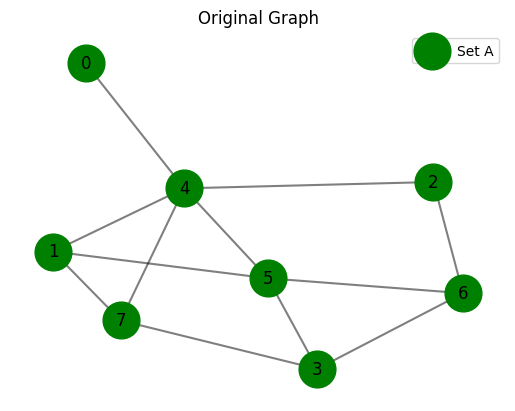

In [36]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def draw_weighted_graph_with_highlighted_cut(adj_matrix, set_a):
    G = nx.Graph()
    for i in range(len(adj_matrix)):
        for j in range(i + 1, len(adj_matrix)):
            if adj_matrix[i][j] > 0:
                G.add_edge(i, j, weight=adj_matrix[i][j])

    np.random.seed(42)
    pos = nx.spring_layout(G, seed=42)  # Positions for all nodes

    # Nodes
    nx.draw_networkx_nodes(G, pos, nodelist=list(set_a), node_color='green', node_size=700, label="Set A")

    # Edges within sets
    intra_edges = [(u, v) for u, v in G.edges() if (u in set_a and v in set_a)]
    nx.draw_networkx_edges(G, pos, edgelist=intra_edges, width=1.5, alpha=0.5, edge_color='black')

    # Labels
    nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

    plt.title("Original Graph")
    plt.axis('off')
    plt.legend(scatterpoints=1)
    plt.show()

def main():
    size = 8
    max_weight = 1
    adj_matrix = matrix
    print("Weighted Adjacency Matrix:")
    print(adj_matrix)

    set_a = set()
    for i in range(size):
      set_a.add(i)

    draw_weighted_graph_with_highlighted_cut(adj_matrix, set_a)

if __name__ == "__main__":
    main()

## Optimal Graph

Weighted Adjacency Matrix:
[[0 0 0 0 1 0 0 0]
 [0 0 0 0 1 1 0 1]
 [0 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 1 1]
 [1 1 1 0 0 1 0 1]
 [0 1 0 1 1 0 1 0]
 [0 0 1 1 0 1 0 0]
 [0 1 0 1 1 0 0 0]]
Number of crossing edges: 10


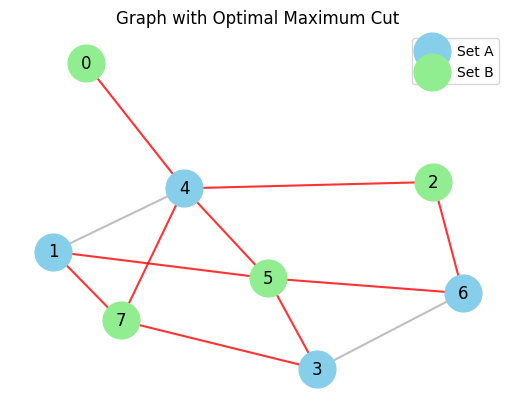

In [37]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def brute_force_maximum_cut(adj_matrix):
    num_vertices = len(adj_matrix)
    max_cut_size = 0
    best_partition = None

    # Generate all possible partitions (2^n subsets)
    for mask in range(1 << num_vertices):
        set_a = set()
        set_b = set()

        for i in range(num_vertices):
            if mask & (1 << i):
                set_a.add(i)
            else:
                set_b.add(i)

        # Calculate the cut size (sum of weights of edges crossing the partition)
        cut_size = 0
        for u in set_a:
            for v in set_b:
                cut_size += adj_matrix[u][v]

        if cut_size > max_cut_size:
            max_cut_size = cut_size
            best_partition = (set_a, set_b)

    return max_cut_size, best_partition

def draw_weighted_graph_with_highlighted_cut(adj_matrix, set_a, set_b):
    G = nx.Graph()
    for i in range(len(adj_matrix)):
        for j in range(i + 1, len(adj_matrix)):
            if adj_matrix[i][j] > 0:
                G.add_edge(i, j, weight=adj_matrix[i][j])

    np.random.seed(42)
    pos = nx.spring_layout(G, seed=42)  # Positions for all nodes

    # Nodes
    nx.draw_networkx_nodes(G, pos, nodelist=list(set_a), node_color='skyblue', node_size=700, label="Set A")
    nx.draw_networkx_nodes(G, pos, nodelist=list(set_b), node_color='lightgreen', node_size=700, label="Set B")

    # Edges within sets
    intra_edges = [(u, v) for u, v in G.edges() if (u in set_a and v in set_a) or (u in set_b and v in set_b)]
    nx.draw_networkx_edges(G, pos, edgelist=intra_edges, width=1.5, alpha=0.5, edge_color='grey')

    # Highlighted edges between sets
    inter_edges = [(u, v) for u, v in G.edges() if (u in set_a and v in set_b) or (u in set_b and v in set_a)]
    nx.draw_networkx_edges(G, pos, edgelist=inter_edges, width=1.5, alpha=0.8, edge_color='red')
    # nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in inter_edges}, label_pos=0.3, font_color='red')

    # Labels
    nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

    plt.title("Graph with Optimal Maximum Cut")
    plt.axis('off')
    plt.legend(scatterpoints=1)
    plt.show()

def main():
    size = 8
    max_weight = 1
    adj_matrix = matrix
    print("Weighted Adjacency Matrix:")
    print(adj_matrix)

    max_cut_size, (set_a, set_b) = brute_force_maximum_cut(adj_matrix)
    print(f'Number of crossing edges: {max_cut_size}')
    draw_weighted_graph_with_highlighted_cut(adj_matrix, set_a, set_b)

if __name__ == "__main__":
    main()